# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [4]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

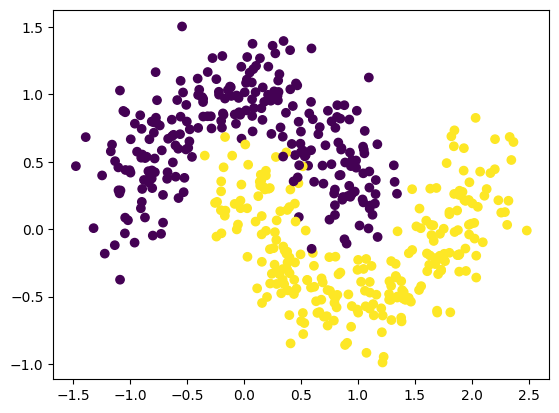

In [8]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

Logistic regression accuracy: 0.8571428571428571


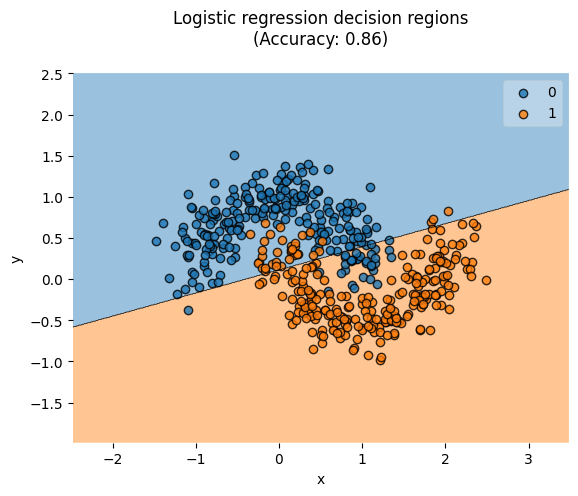

SVM accuracy: 0.8628571428571429


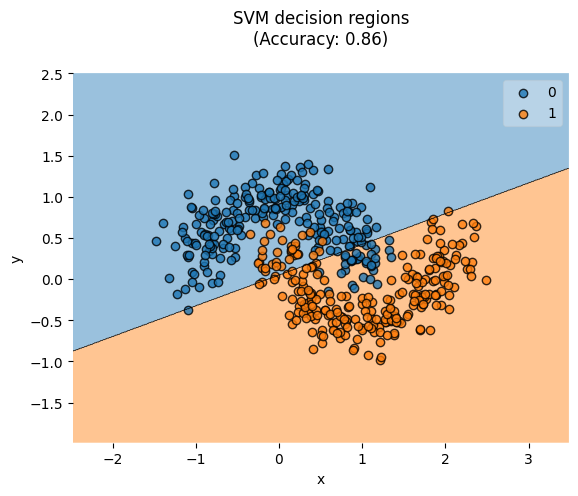

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(C=5) # add some params
svm = SVC(kernel='linear', C=3) # here too



def plot_decisions(estimator, 
                  title: str= "", 
                  X: np.ndarray = moons_points, 
                  y: np.ndarray = moons_labels, 
                  test_size: float=0.35):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    estimator.fit(X_train, y_train)

    print(title + " accuracy:", metrics.accuracy_score(estimator.predict(X_test), y_test))
    plot_decision_regions(X, y, estimator, markers="o")
    plt.xlabel("x")
    plt.ylabel("y")

    accuracy_title = "Accuracy: " + str(round(metrics.accuracy_score(estimator.predict(X_test), y_test), 2))
    plt.title(title + " decision regions\n(" + accuracy_title + ")\n")
    plt.show()

plot_decisions(lr, "Logistic regression")
plot_decisions(svm, "SVM")


**Conclusion:** in this case there is no linear separating hyperplane and hence SVM doesn't classify better then simple logit.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

SVM (poly) accuracy: 0.9771428571428571


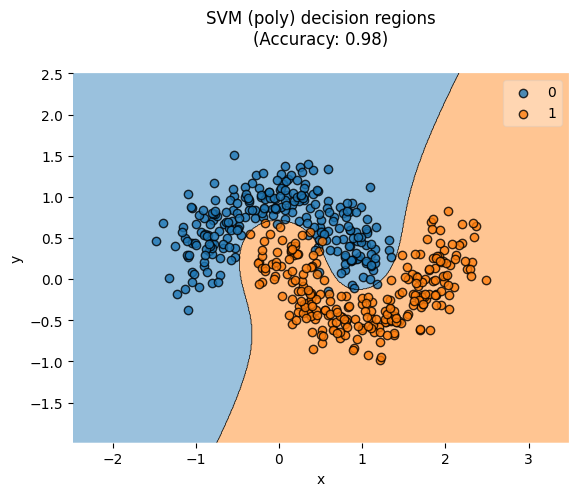

In [186]:
svm_poly = SVC(kernel='poly', C=50, coef0=1)
plot_decisions(svm_poly, "SVM (poly)")

SVM (rbf) accuracy: 0.9828571428571429


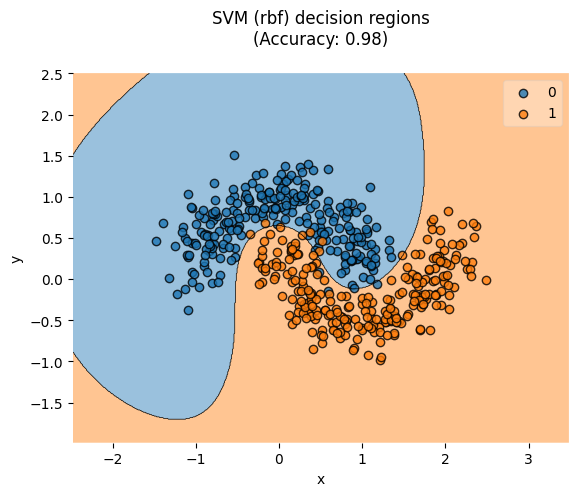

In [127]:
svm_poly = SVC(kernel='rbf', C=25)
plot_decisions(svm_poly, "SVM (rbf)")

SVM (sigmoid) accuracy: 0.6857142857142857


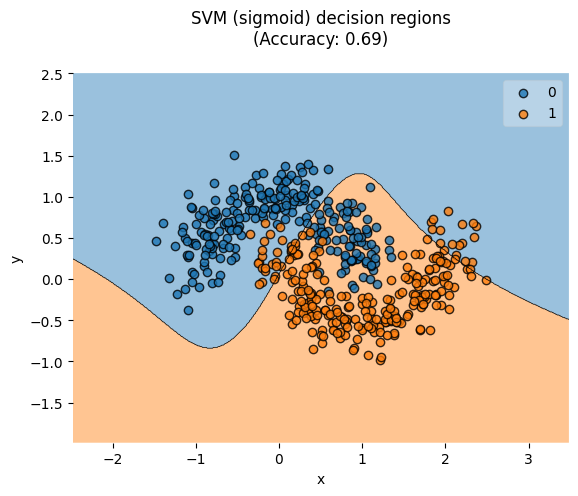

In [146]:
svm_poly = SVC(kernel='sigmoid', C=0.1)
plot_decisions(svm_poly, "SVM (sigmoid)")

**Conclusion:** polynomial and rbf kernels are good for this shape, while sigmoid is even worse than simple linear.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Poly features + logit accuracy: 0.9828571428571429


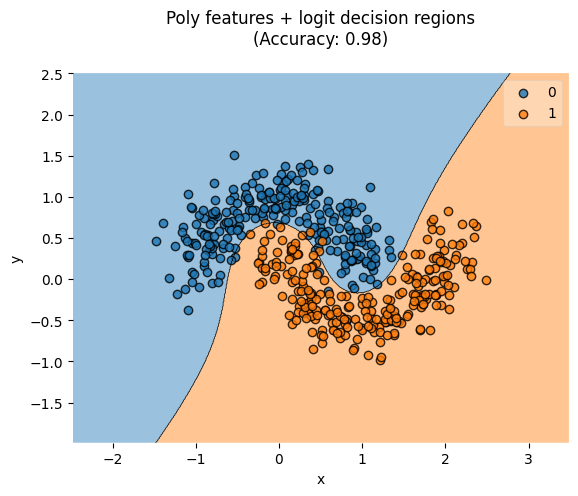

In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(3)),
    ('logit', LogisticRegression(C=50, max_iter=500))
])

plot_decisions(pipe, "Poly features + logit")

To avoid overfitting, we choose degree = 3, because it is enough for this classification problem (as we see, there are two inflections, so degree should be 3). So, results are very good and decision curve seems more natural than SVM with kernels.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

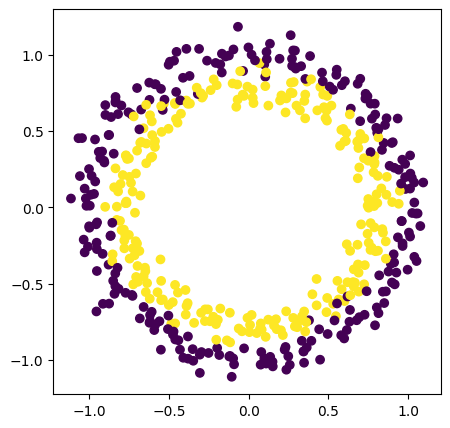

In [222]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

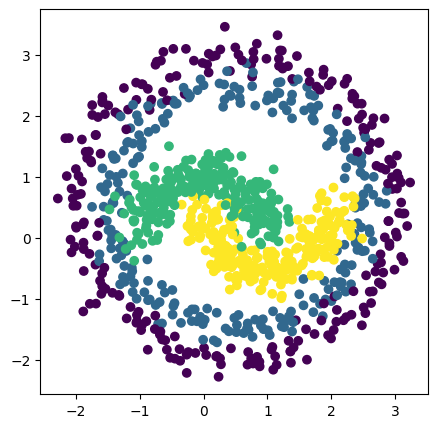

In [223]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Poly features + logit (hardened sample) accuracy: 0.9371428571428572


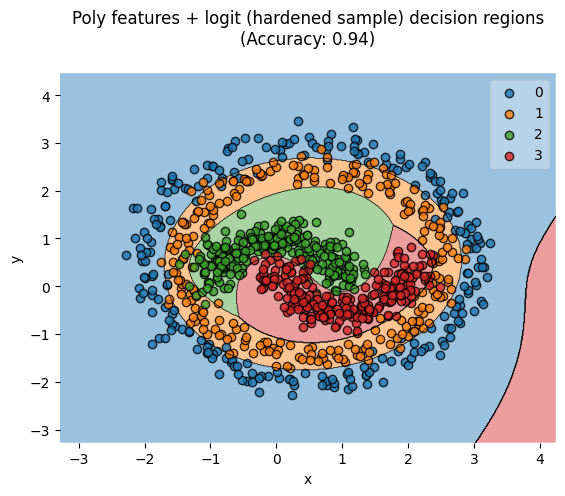

In [225]:
pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(3)),
    ('logit', LogisticRegression(C=50, max_iter=2000))
])

plot_decisions(pipe, "Poly features + logit on stacked data",
    points, labels)

Again, it is enough to take degree=3 to classify blue and yellow points using their radius (which takes only first 2 degrees) and then green and red using same approach as in previous example.

Let us ensure that degree=2 is enough for circles classification:

Poly features + logit on circles accuracy: 0.9485714285714286


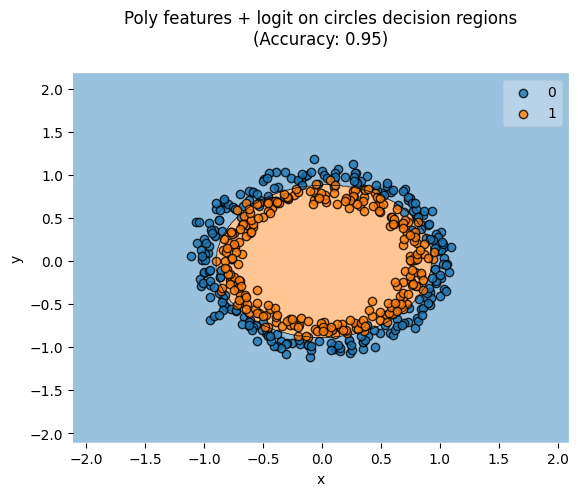

In [253]:
pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(2)),
    ('logit', LogisticRegression(C=50, max_iter=2000))
])

plot_decisions(pipe, "Poly features + logit on circles",
    circles_points, circles_labels)

RBF kernel is best for circles classification as we know from HW3:

SVM (RBF) on circles accuracy: 0.9485714285714286


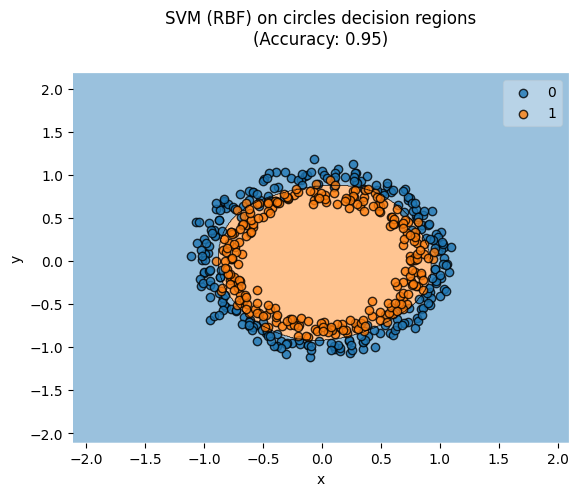

In [237]:
svm_poly = SVC(kernel='rbf', C=25)
plot_decisions(svm_poly, "SVM (RBF) on circles",
    circles_points, circles_labels)

We may then try to use it for stacked points as we know that RBF went well with moons:


SVM (RBF) on circles accuracy: 0.9371428571428572


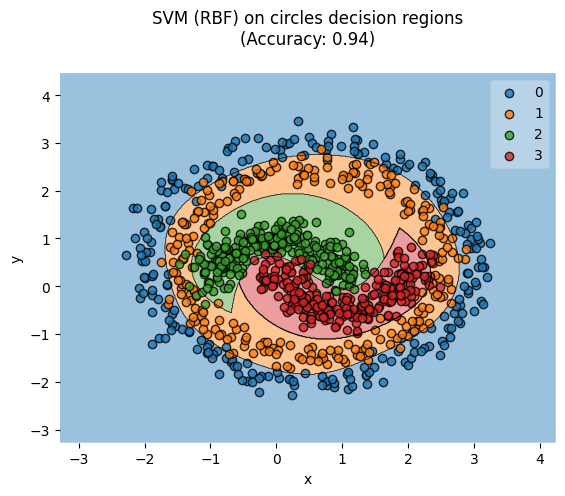

In [238]:
svm_poly = SVC(kernel='rbf', C=25)
plot_decisions(svm_poly, "SVM (RBF) on stacked data",
    points, labels)

We see that accuracy is equal to polynomial features approach accuracy, but for me the decision curves seem lees natural.


Now let`s try polynomial kernel.

SVM (RBF) on stacked data accuracy: 0.9285714285714286


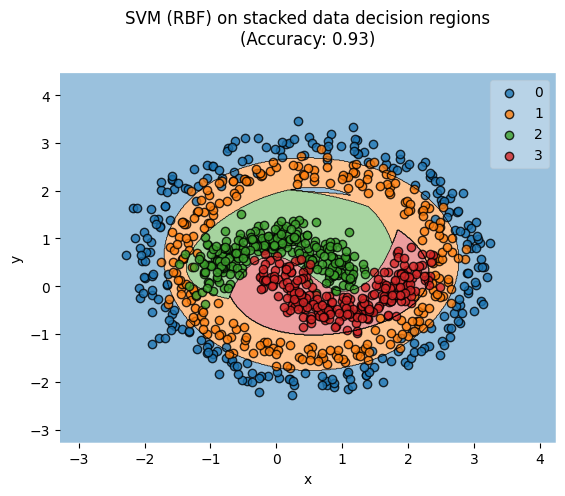

In [250]:
svm_poly = SVC(kernel='poly', C=50, coef0=1, degree=3)
plot_decisions(svm_poly, "SVM (RBF) on stacked data",
    points, labels)

We got accuracy 93%, which is good, but separating curves seem even more unnatural comparing to RBF.

There is no reason to try sigmoid with stacked data as we know that it works bad with moons. But let us try to classify at least circles using sigmoid kernel:

SVM (sigmoid) accuracy: 0.49714285714285716


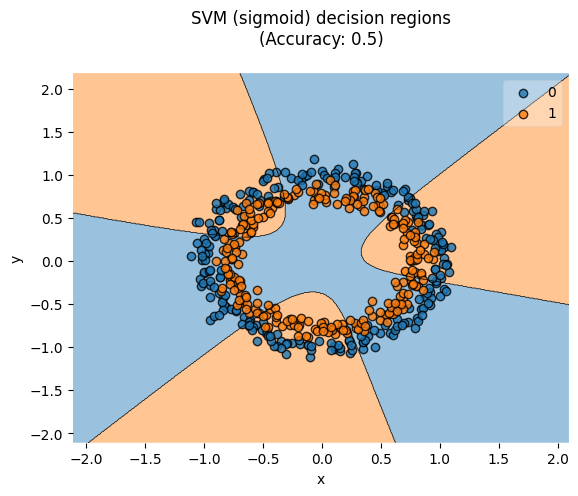

In [257]:
svm_poly = SVC(kernel='sigmoid', C=10)
plot_decisions(svm_poly, "SVM (sigmoid)",
    circles_points, circles_labels)

As we see, sigmoid kernel is completely inappropriate for this task.

**Conclusion:** we can see that SVM with different kernels (in this case, RBF turned out to be the most appropriate) can classify different complex shapes. But with simple linear regression on polynomial featurs we can achieve even better results.